In [2]:
from sympy import *
from sympy.physics.mechanics import LagrangesMethod, Lagrangian
from sympy.physics.mechanics import ReferenceFrame, Particle, Point
from sympy.physics.mechanics import dynamicsymbols, kinetic_energy
from sympy.physics.mechanics import mprint, mlatex
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from sympy.plotting import plot

In [3]:
init_vprinting()

In [4]:
#Angulos de las juntas 1,2
theta1 = dynamicsymbols("theta_1")
theta2 = dynamicsymbols("theta_2")

In [5]:
theta1

In [5]:
theta2

In [6]:
theta1_d = dynamicsymbols("theta_1",1)
theta1_d

In [7]:
theta2_d = dynamicsymbols("theta_2",1)
theta2_d

In [8]:
m1,lg1,l1,m2,lg2,g,t,I1,I2 = symbols("m_1 l_g1 l_1 m_2 l_g2 g t I1 I2")

In [9]:
lg1

In [10]:
#Posiciones de cada masa puntual en el sistema coordeando x-y
x1 = lg1 * cos(theta1)
y1 = lg1 * sin(theta1)
x2 = l1 * cos(theta1) + lg2 * cos(theta1+theta2)
y2 = l1 * sin(theta1) + lg2 * sin(theta1+theta2)
x2

In [11]:
y2

In [12]:
#Momentos de inercia
i1 = Rational(1/2)*I1*diff(theta1,t)**2
i2 = Rational(1/2)*I2*(diff(theta1,t)+diff(theta2,t))**2
i2

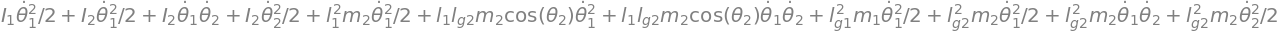

In [13]:
# Energia Cinética
k1 = Rational(1/2)*m1*(diff(x1,t))**2 + Rational(1/2)*m1*(diff(y1,t))**2 + i1
k2 = Rational(1/2)*m2*(diff(x2,t))**2 + Rational(1/2)*m2*(diff(y2,t))**2 + i2
k = simplify(k1 + k2)
k

In [14]:
# Energia Potencial
u1 = m1 * g * y1
u2 = m2 * g * y2
u = u1 + u2
u

In [15]:
u1

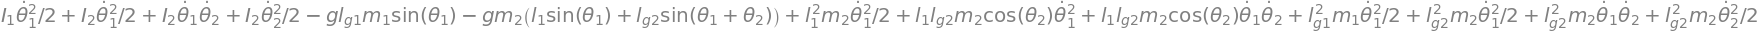

In [16]:
#Lagrangian
Lagr = k-u
Lagr

In [17]:
#Lagrange Equations
rhs1 = simplify(diff(Lagr,theta1))
rhs2 = simplify(diff(Lagr,theta2))

In [18]:
lhs1 = simplify(diff(diff(Lagr,diff(theta1,t)),t))
lhs2 = simplify(diff(diff(Lagr,diff(theta2,t)),t))

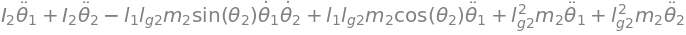

In [19]:
display(lhs2)

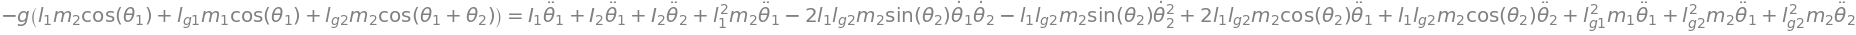

In [20]:
Eq1 = Eq(rhs1,lhs1)
Eq1

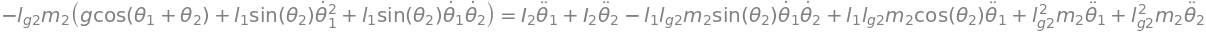

In [21]:
Eq2 = Eq(rhs2,lhs2)
Eq2

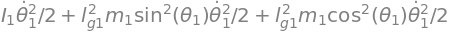

In [22]:
k1

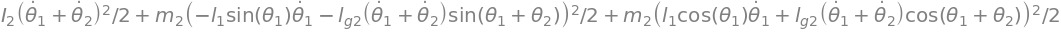

In [23]:
k2

In [24]:
expand(u)

In [25]:
#Cálculo del Jacobiano del Link 1
J1 = Matrix([[diff(x1,theta1),diff(x1,theta2)],[diff(y1,theta1),diff(y1,theta2)],[1,0]])
J1

⎡-l_g1⋅sin(θ₁)  0⎤
⎢                ⎥
⎢l_g1⋅cos(θ₁)   0⎥
⎢                ⎥
⎣      1        0⎦

In [26]:
qdot = Matrix([[theta1_d],[theta2_d]])
display(qdot)

⎡θ₁̇⎤
⎢  ⎥
⎣θ₂̇⎦

In [27]:
V1 = J1*qdot
display(V1)

⎡-l_g1⋅sin(θ₁)⋅θ₁̇⎤
⎢                ⎥
⎢l_g1⋅cos(θ₁)⋅θ₁̇ ⎥
⎢                ⎥
⎣       θ₁̇       ⎦

In [28]:
G1 = Matrix([[m1,0,0],[0,m1,0],[0,0,I1]])
display(G1)

⎡m₁  0   0 ⎤
⎢          ⎥
⎢0   m₁  0 ⎥
⎢          ⎥
⎣0   0   I₁⎦

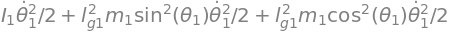

In [29]:
kk1 = Rational(1/2) * V1.T * G1 * V1
display (kk1[0,0])

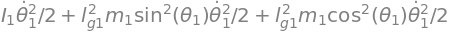

In [159]:
#Obtención de la Energía cinética a partir de las variables generalizadas
kk1 = Rational(1/2) * qdot.T * J1.T * G1 * J1 * qdot
display (expand(kk1[0,0]))

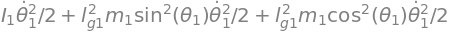

In [30]:
#Comparación con la energía cinética obtenida derivando la posición (ver arriba)
display (k1)

In [31]:
#Mass Matrix
M1 = J1.T * G1 * J1
display(M1)

⎡         2       2           2       2       ⎤
⎢I₁ + l_g1 ⋅m₁⋅sin (θ₁) + l_g1 ⋅m₁⋅cos (θ₁)  0⎥
⎢                                             ⎥
⎣                    0                       0⎦

In [32]:
#Cálculo del Jacobiano del Link 2
J2 = Matrix([[diff(x2,theta1),diff(x2,theta2)],[diff(y2,theta1),diff(y2,theta2)],[1,1]])
J2

⎡-l₁⋅sin(θ₁) - l_g2⋅sin(θ₁ + θ₂)  -l_g2⋅sin(θ₁ + θ₂)⎤
⎢                                                   ⎥
⎢l₁⋅cos(θ₁) + l_g2⋅cos(θ₁ + θ₂)   l_g2⋅cos(θ₁ + θ₂) ⎥
⎢                                                   ⎥
⎣               1                         1         ⎦

In [33]:
V2 = J2*qdot
display(V2)

⎡-l_g2⋅sin(θ₁ + θ₂)⋅θ₂̇ + (-l₁⋅sin(θ₁) - l_g2⋅sin(θ₁ + θ₂))⋅θ₁̇⎤
⎢                                                            ⎥
⎢ l_g2⋅cos(θ₁ + θ₂)⋅θ₂̇ + (l₁⋅cos(θ₁) + l_g2⋅cos(θ₁ + θ₂))⋅θ₁̇ ⎥
⎢                                                            ⎥
⎣                          θ₁̇ + θ₂̇                           ⎦

In [34]:
G2 = Matrix([[m2,0,0],[0,m2,0],[0,0,I2]])
display(G2)

⎡m₂  0   0 ⎤
⎢          ⎥
⎢0   m₂  0 ⎥
⎢          ⎥
⎣0   0   I₂⎦

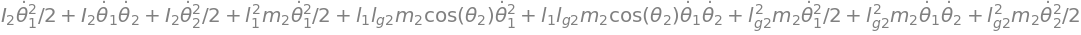

In [35]:
kk2 = Rational(1/2) * V2.T * G2 * V2
display (simplify(kk2[0,0]))
#display (kk2)

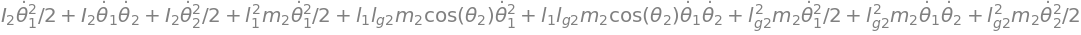

In [36]:
#Comparación con la energía cinética obtenida derivando la posición (ver arriba)
display (simplify(k2))

In [37]:
#Mass Matrix
M2 = J2.T * G2 * J2
display(M2)

⎡                                                          2                  
⎢                 I₂ + m₂⋅(-l₁⋅sin(θ₁) - l_g2⋅sin(θ₁ + θ₂))  + m₂⋅(l₁⋅cos(θ₁) 
⎢                                                                             
⎢                                                                             
⎣I₂ - l_g2⋅m₂⋅(-l₁⋅sin(θ₁) - l_g2⋅sin(θ₁ + θ₂))⋅sin(θ₁ + θ₂) + l_g2⋅m₂⋅(l₁⋅cos

                    2                                                         
+ l_g2⋅cos(θ₁ + θ₂))                    I₂ - l_g2⋅m₂⋅(-l₁⋅sin(θ₁) - l_g2⋅sin(θ
                                                                              
                                                                              
(θ₁) + l_g2⋅cos(θ₁ + θ₂))⋅cos(θ₁ + θ₂)                                 I₂ + l_

                                                                             ⎤
₁ + θ₂))⋅sin(θ₁ + θ₂) + l_g2⋅m₂⋅(l₁⋅cos(θ₁) + l_g2⋅cos(θ₁ + θ₂))⋅cos(θ₁ + θ₂)⎥
                                                  

In [38]:
#Compiled Mass Matrix
M = simplify(M1 + M2)
display(M)

⎡            2                                 2          2                   
⎢I₁ + I₂ + l₁ ⋅m₂ + 2⋅l₁⋅l_g2⋅m₂⋅cos(θ₂) + l_g1 ⋅m₁ + l_g2 ⋅m₂  I₂ + l₁⋅l_g2⋅m
⎢                                                                             
⎢                                           2                                 
⎣             I₂ + l₁⋅l_g2⋅m₂⋅cos(θ₂) + l_g2 ⋅m₂                          I₂ +

                2   ⎤
₂⋅cos(θ₂) + l_g2 ⋅m₂⎥
                    ⎥
     2              ⎥
 l_g2 ⋅m₂           ⎦

In [39]:
#The gravitational force vector
G = Matrix([[diff(u,theta1)],[diff(u,theta2)]])
display(G)

⎡g⋅l_g1⋅m₁⋅cos(θ₁) + g⋅m₂⋅(l₁⋅cos(θ₁) + l_g2⋅cos(θ₁ + θ₂))⎤
⎢                                                         ⎥
⎣                 g⋅l_g2⋅m₂⋅cos(θ₁ + θ₂)                  ⎦

In [40]:
#Centrifugal and Coriolis forces
H = diff(M,t) - Rational(1/2)*(theta1_d*diff(M,theta1).T + theta2_d*diff(M,theta2).T)
C = simplify(H*qdot)
display(C)

⎡-l₁⋅l_g2⋅m₂⋅(2⋅θ₁̇ + θ₂̇)⋅sin(θ₂)⋅θ₂̇ ⎤
⎢───────────────────────────────────⎥
⎢                 2                 ⎥
⎢                                   ⎥
⎢    -l₁⋅l_g2⋅m₂⋅sin(θ₂)⋅θ₁̇⋅θ₂̇      ⎥
⎢    ──────────────────────────     ⎥
⎣                2                  ⎦

In [171]:
#IM = M.inv()

In [172]:
#A = (-1)*IM*(HH+g)

In [173]:
#def Manipulador(p,k):
#    theta1, theta1_d, theta2, theta2_d = p
    #IM = M.inv()
#    A = (-1)*IM*(H + g)
#    theta1_dd, theta2_dd = A
#   return [theta1_d, theta1_dd, theta2_d, theta2_dd]

In [41]:
q = Matrix([[theta1],[theta2]])
#qdot
display (q)

⎡θ₁⎤
⎢  ⎥
⎣θ₂⎦

In [42]:
C

⎡-l₁⋅l_g2⋅m₂⋅(2⋅θ₁̇ + θ₂̇)⋅sin(θ₂)⋅θ₂̇ ⎤
⎢───────────────────────────────────⎥
⎢                 2                 ⎥
⎢                                   ⎥
⎢    -l₁⋅l_g2⋅m₂⋅sin(θ₂)⋅θ₁̇⋅θ₂̇      ⎥
⎢    ──────────────────────────     ⎥
⎣                2                  ⎦

In [43]:
# compile functions to numerical code
mass_matrix = lambdify([q], M)
coriolis_matrix = lambdify([q, qdot], C)
gravity_vector = lambdify([q], G)

In [95]:
def force(cls, q, dq, ddq):
    M = cls.mass_matrix(q)
    C = cls.coriolis_matrix(q, qdot)
    G = cls.gravity_vector(q)

    return M @ ddq + C @ dq + g

In [96]:
import numpy as np

In [97]:
np.random.seed(0)
q = np.random.random(2) * [2 * np.pi, 2 * np.pi] - [np.pi, np.pi]
dq = np.random.random(2) * 2 - 1
ddq = np.random.random(2) * 2 - 1

In [98]:
np.random.seed(0)

def random_motion():
    q = np.random.random(2) * [2 * np.pi, 2 * np.pi] - [np.pi, np.pi]
    dq = np.random.random(2) * 2 - 1
    ddq = np.random.random(2) * 2 - 1
    return q, dq, ddq

In [99]:
%%timeit q, dq, ddq = random_motion()

UsageError: %%timeit is a cell magic, but the cell body is empty. Did you mean the line magic %timeit (single %)?


In [176]:
m1 = 1.0
m2 = 1.0
I1 = 1.0
I2 = 1.0
l1 = 1.0
lg1 = 0.5
lg2 = 0.5
g = 9.8

In [104]:
#params =[m_1, m_2, I_1, I_2, l_1, l_g1, l_g2, g ]
#values =[1, 1, 1, 1, 1, 0.5, 0.5, 9.8]

In [177]:
#mass_matrix(q)

In [178]:
M

⎡            2                                 2          2                   
⎢I₁ + I₂ + l₁ ⋅m₂ + 2⋅l₁⋅l_g2⋅m₂⋅cos(θ₂) + l_g1 ⋅m₁ + l_g2 ⋅m₂  I₂ + l₁⋅l_g2⋅m
⎢                                                                             
⎢                                           2                                 
⎣             I₂ + l₁⋅l_g2⋅m₂⋅cos(θ₂) + l_g2 ⋅m₂                          I₂ +

                2   ⎤
₂⋅cos(θ₂) + l_g2 ⋅m₂⎥
                    ⎥
     2              ⎥
 l_g2 ⋅m₂           ⎦

In [179]:
MM = M.subs([(m1,1),(m2,1),(I1,1),(I2,1),(l1,1),(lg1,0.5),(lg2,0.5),(theta2,0.5)])

In [184]:
format(M)

'Matrix([[I1 + I2 + l_1**2*m_2 + 2*l_1*l_g2*m_2*cos(theta_2(t)) + l_g1**2*m_1 + l_g2**2*m_2, I2 + l_1*l_g2*m_2*cos(theta_2(t)) + l_g2**2*m_2], [I2 + l_1*l_g2*m_2*cos(theta_2(t)) + l_g2**2*m_2, I2 + l_g2**2*m_2]])'

In [ ]:
#print("After Substitution : {}".format(MM))

In [122]:
#m1,lg1,l1,m2,lg2,g,t,I1,I2 = symbols("m_1 l_g1 l_1 m_2 l_g2 g t I1 I2")
#jacobi = lambdify([])

In [ ]:
#m1,lg1,l1,m2,lg2,g,t,I1,I2 = symbols("m_1 l_g1 l_1 m_2 l_g2 g t I1 I2")

In [128]:
c = lambdify([lg1, theta1], J1, "numpy")

In [129]:
#gg = g.subs([(m_1,1),(m_2,1),(I_1,1),(I_2,1),(l_g2,0.5),(theta1,0.5),(theta2,0.5),(g,9.8)])
#display(gg)
J1

⎡-l_g1⋅sin(θ₁)  0⎤
⎢                ⎥
⎢l_g1⋅cos(θ₁)   0⎥
⎢                ⎥
⎣      1        0⎦

In [130]:
jacobi(5,0.5)
#print(jacobi_eval)

array([[-2.39712769,  0.        ],
       [ 4.38791281,  0.        ],
       [ 1.        ,  0.        ]])